# ***#Theory Questions:- ***

1. **What does R-squared represent in a regression model?**
   - R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.
---
2. **What are the assumptions of linear regression?**
   - Linearity: The relationship between the independent and dependent variables is linear.
   - Independence: Observations are independent of each other.
   - Homoscedasticity: The variance of residuals is constant across all levels of the independent variables.
   - Normality: Residuals are normally distributed.
   - No Multicollinearity: Independent variables are not highly correlated with each other.
---
3. **What is the difference between R-squared and Adjusted R-squared?**
   - R-squared measures the goodness of fit without considering the number of predictors.
   - Adjusted R-squared penalizes for adding irrelevant predictors, making it more reliable for models with multiple predictors.
---
4. **Why do we use Mean Squared Error (MSE)?**
   - MSE measures the average squared difference between the predicted and actual values. It emphasizes larger errors due to squaring, making it sensitive to outliers.
---
5. **What does an Adjusted R-squared value of 0.85 indicate?**
   - It means that 85% of the variance in the dependent variable is explained by the independent variables, accounting for the number of predictors in the model.
---
6. **How do we check for normality of residuals in linear regression?**
   - By using visual methods like histograms, Q-Q plots, or statistical tests like the Shapiro-Wilk or Kolmogorov-Smirnov test.
---
7. **What is multicollinearity, and how does it impact regression?**
   - Multicollinearity occurs when independent variables are highly correlated, making it difficult to determine their individual contributions and leading to unreliable coefficient estimates.
---
8. **What is Mean Absolute Error (MAE)?**
   - MAE is the average of the absolute differences between predicted and actual values. It is less sensitive to outliers compared to MSE.
---
9. **What are the benefits of using an ML pipeline?**
   - Pipelines streamline the workflow by automating preprocessing, model training, and evaluation, ensuring reproducibility and reducing errors.
---
10. **Why is RMSE considered more interpretable than MSE?**
    - RMSE is in the same units as the dependent variable, making it easier to interpret compared to MSE, which is squared.
---
11. **What is pickling in Python, and how is it useful in ML?**
    - Pickling serializes Python objects, such as trained ML models, for storage and later use, ensuring model reusability.
---
12. **What does a high R-squared value mean?**
    - It indicates that a large proportion of the variance in the dependent variable is explained by the independent variables.
---
13. **What happens if linear regression assumptions are violated?**
    - The model may produce biased or inefficient estimates, leading to poor predictions and unreliable inferences.
---
14. **How can we address multicollinearity in regression?**
    - By removing highly correlated variables, using dimensionality reduction (e.g., PCA), or regularization techniques like Ridge or Lasso regression.
---
15. **How can feature selection improve model performance in regression analysis?**
    - It reduces overfitting, enhances model interpretability, and improves computational efficiency by eliminating irrelevant predictors.
---
16. **How is Adjusted R-squared calculated?**
    - Adjusted R-squared = \(1 - \frac{(1 - R^2)(n - 1)}{n - k - 1}\), where \(n\) is the number of observations and \(k\) is the number of predictors.
---
17. **Why is MSE sensitive to outliers?**
    - Because it squares the errors, amplifying the impact of larger deviations.
---
18. **What is the role of homoscedasticity in linear regression?**
    - Homoscedasticity ensures that the model's residual variance remains consistent, improving reliability and validity.
---
19. **What is Root Mean Squared Error (RMSE)?**
    - RMSE is the square root of MSE, representing the standard deviation of residuals.
---
20. **Why is pickling considered risky?**
    - Pickled files can execute arbitrary code upon loading, making them vulnerable to malicious exploitation.
---
21. **What alternatives exist to pickling for saving ML models?**
    - Alternatives include joblib (optimized for large NumPy arrays), ONNX (interoperability), and frameworks like TensorFlow SavedModel or PyTorch's model serialization.
---
22. **What is heteroscedasticity, and why is it a problem?**
    - Heteroscedasticity occurs when residual variance changes across levels of independent variables, violating regression assumptions and leading to inefficient estimates.
---
23. **How can interaction terms enhance a regression model's predictive power?**
    - Interaction terms capture combined effects of variables, improving the model's ability to predict outcomes influenced by variable interactions.
---    


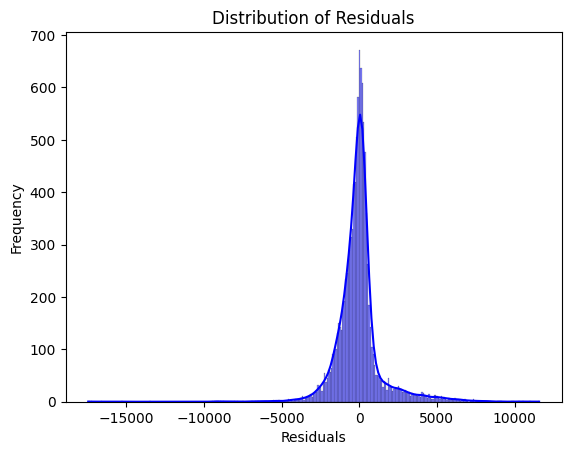

In [1]:
# Question: Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']].dropna()
y = diamonds['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals distribution
sns.histplot(residuals, kde=True, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [2]:
# Question: Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MSE: 2242178.9040856035
MAE: 888.4808633901026
RMSE: 1497.3906985438382


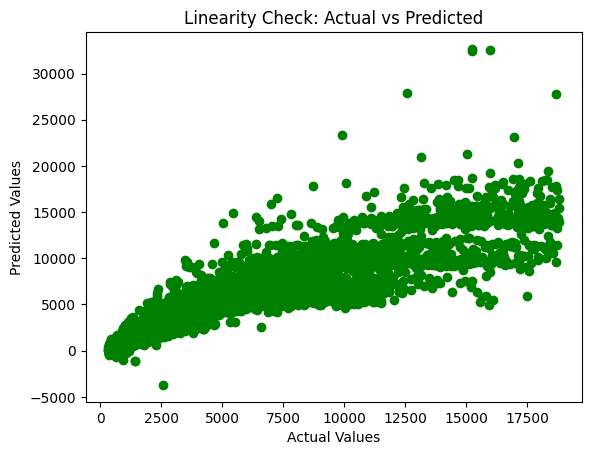

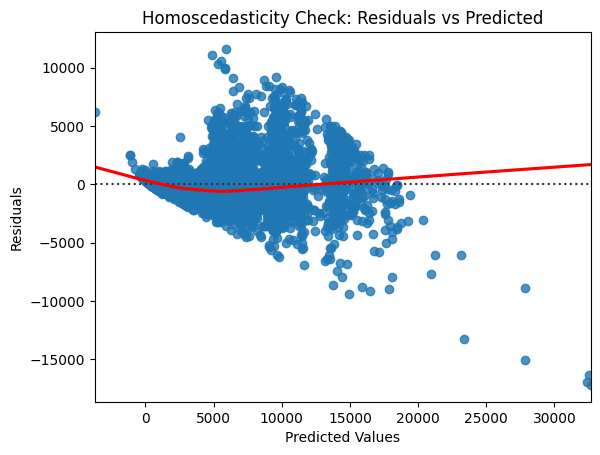

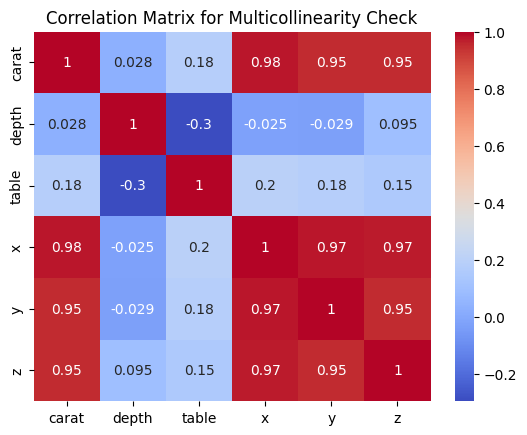

In [3]:
# Question: Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import pandas as pd

# Linearity check
plt.scatter(y_test, y_pred, color='green')
plt.title("Linearity Check: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Homoscedasticity check
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Multicollinearity check
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Multicollinearity Check")
plt.show()


In [6]:
# Question: Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a pipeline with feature scaling and regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Evaluate pipeline with cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Average R-squared score across folds: {scores.mean()}")


Average R-squared score across folds: 0.21674154334329784


In [7]:
# Question: Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients, intercept, and R-squared score
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared score: {model.score(X, y)}")


Coefficient: 44.43716999225497
Intercept: 1.1651153205269726
R-squared score: 0.9538252459635717


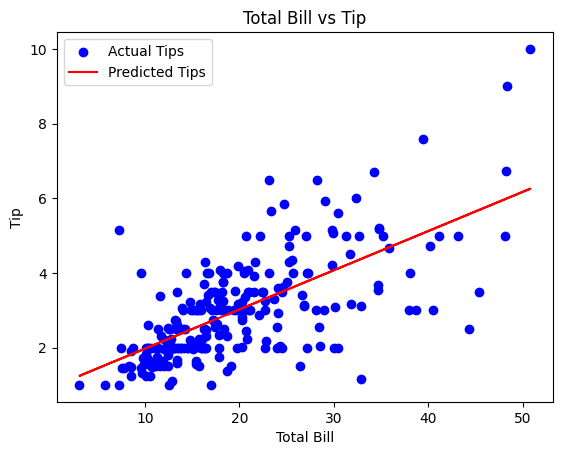

In [8]:
# Question: Write a Python script that analyzes the relationship between total bill and tip in the tips dataset using simple linear regression and visualizes the results.

import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Select features and target
X = tips[['total_bill']]
y = tips['tip']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict tips
y_pred = model.predict(X)

# Visualize actual vs predicted tips
plt.scatter(X, y, label='Actual Tips', color='blue')
plt.plot(X, y_pred, label='Predicted Tips', color='red')
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.show()


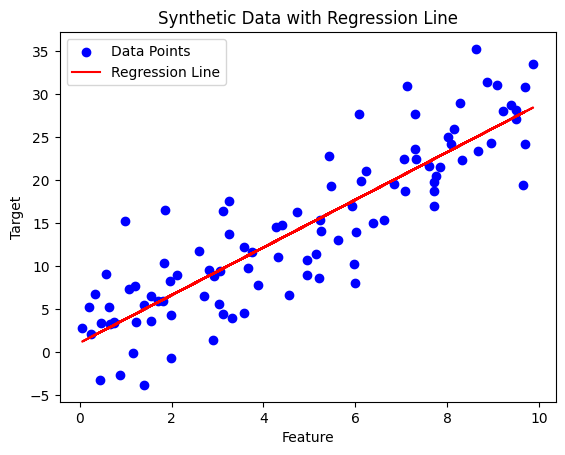

In [9]:
# Question: Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features
y = 3 * X.squeeze() + np.random.randn(100) * 5  # Target

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_pred, label='Regression Line', color='red')
plt.title("Synthetic Data with Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [10]:
# Question: Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle

# Save the trained model to a file
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'linear_model.pkl'")


Model saved as 'linear_model.pkl'


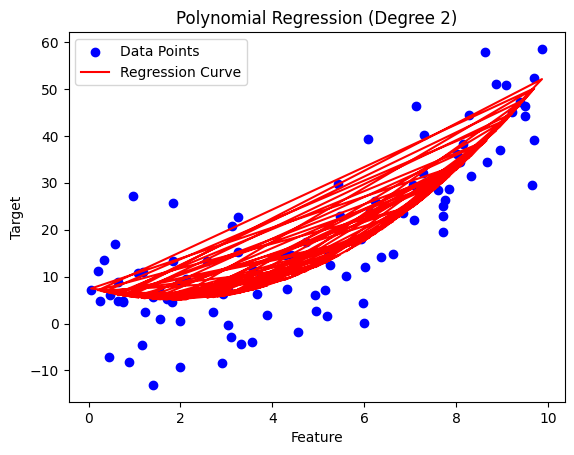

In [11]:
# Question: Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 + 0.5 * X.squeeze()**2 + np.random.randn(100) * 10

# Fit polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

# Plot data points and regression curve
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_poly_pred, label='Regression Curve', color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [12]:
# Question: Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 1) * 20
y = 4 * X.squeeze() + 10 + np.random.randn(50) * 5

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficient and intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient: 3.9441415009632763
Intercept: 10.483446372344424


In [13]:
# Question: Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(50, 1) * 20
y = 4 * X.squeeze() + 10 + np.random.randn(50) * 5

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficient and intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient: 3.9441415009632763
Intercept: 10.483446372344424


In [14]:
# Question: Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared score: {model.score(X, y)}")


Coefficients: [86.00258028 74.11675411]
Intercept: 0.21635808446095606
R-squared score: 0.9897849636638466


In [15]:
# Question: Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared score: {model.score(X, y)}")


Coefficients: [86.00258028 74.11675411]
Intercept: 0.21635808446095606
R-squared score: 0.9897849636638466


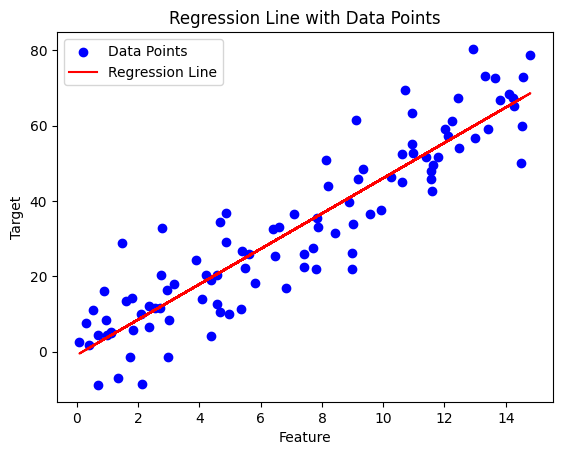

In [16]:
# Question: Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 15
y = 5 * X.squeeze() - 3 + np.random.randn(100) * 10

# Train linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_pred, label='Regression Line', color='red')
plt.title("Regression Line with Data Points")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [17]:
# Question: Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 3) * 10
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Print VIF values
print(vif_data)


    Feature       VIF
0  Feature1  2.657195
1  Feature2  2.803703
2  Feature3  2.554971


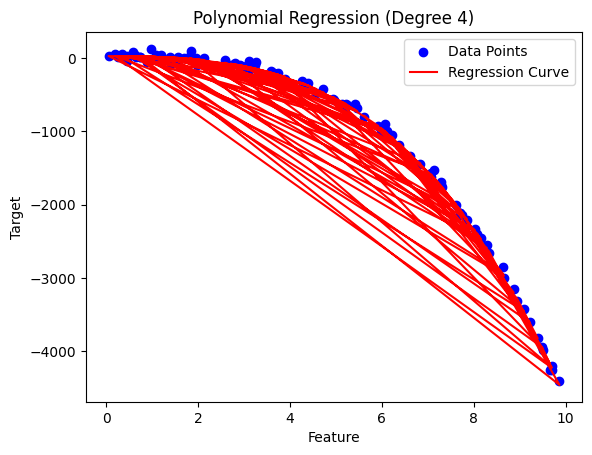

In [18]:
# Question: Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 - 3 * X.squeeze() + 4 * X.squeeze()**2 - 5 * X.squeeze()**3 + np.random.randn(100) * 50

# Fit polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

# Plot data points and regression curve
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_poly_pred, label='Regression Curve', color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


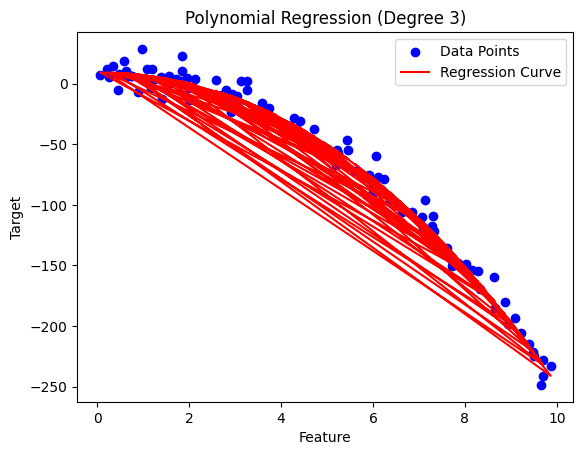

In [19]:
# Question: Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 + 5 * X.squeeze() - 3 * X.squeeze()**2 + np.random.randn(100) * 10

# Fit polynomial regression model (degree 3)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

# Plot data points and regression curve
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_poly_pred, label='Regression Curve', color='red')
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [20]:
# Question: Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

# Generate synthetic data with 5 features
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Print R-squared score and coefficients
print(f"R-squared score: {model.score(X, y)}")
print(f"Coefficients: {model.coef_}")


R-squared score: 0.9955395169111729
Coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]


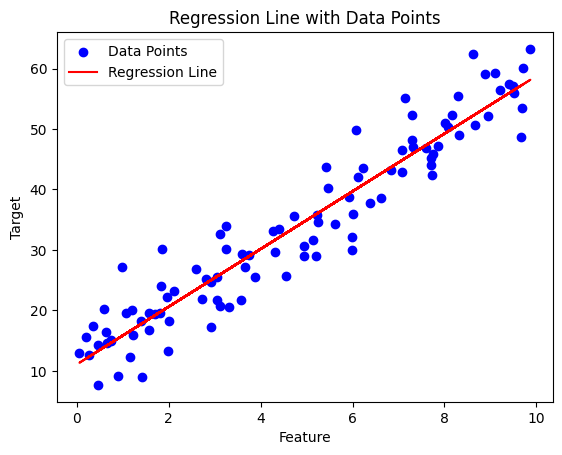

In [21]:
# Question: Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 * X.squeeze() + 10 + np.random.randn(100) * 5

# Train linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_pred, label='Regression Line', color='red')
plt.title("Regression Line with Data Points")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [22]:
# Question: Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.

# Generate synthetic data with 3 features
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Train multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print R-squared score and coefficients
print(f"R-squared score: {model.score(X, y)}")
print(f"Coefficients: {model.coef_}")


R-squared score: 0.9854985450036718
Coefficients: [28.3172211  73.99152663 18.79832083]


In [23]:
# Question: Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

import joblib

# Save the trained model using joblib
joblib.dump(model, 'linear_model.joblib')

# Load the trained model
loaded_model = joblib.load('linear_model.joblib')
print("Model loaded successfully.")


Model loaded successfully.


In [24]:
# Question: Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn tips dataset.

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Seaborn tips dataset
tips = sns.load_dataset("tips")

# Prepare features (with categorical feature 'sex') and target variable
X = tips[['total_bill', 'sex']]
y = tips['tip']

# Define a column transformer to apply one-hot encoding on 'sex'
preprocessor = ColumnTransformer(
    transformers=[('sex', OneHotEncoder(), ['sex'])],
    remainder='passthrough'
)

# Create a pipeline that first transforms the data and then fits a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Print the R-squared score on the test set
print(f"R-squared score: {pipeline.score(X_test, y_test)}")


R-squared score: 0.5431115864592302


In [25]:
# Question: Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.

from sklearn.linear_model import Ridge

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Train Ridge regression model (with alpha = 1)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X, y)

# Print coefficients and R-squared scores
print("Linear Regression:")
print(f"Coefficients: {lr_model.coef_}")
print(f"R-squared score: {lr_model.score(X, y)}")

print("\nRidge Regression:")
print(f"Coefficients: {ridge_model.coef_}")
print(f"R-squared score: {ridge_model.score(X, y)}")


Linear Regression:
Coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]
R-squared score: 0.9955395169111729

Ridge Regression:
Coefficients: [61.23949497 97.79581017 60.24721716 54.3702388  35.37785535]
R-squared score: 0.9954097493195544


In [26]:
# Question: Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

from sklearn.model_selection import cross_val_score

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Train linear regression model
model = LinearRegression()

# Evaluate the model using cross-validation (using R-squared as the scoring metric)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation results
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Average R-squared score: {cv_scores.mean()}")


Cross-validation R-squared scores: [0.99336803 0.99000491 0.99770889 0.9913085  0.99330699]
Average R-squared score: 0.9931394633728811


In [27]:
# Question: Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 + 5 * X.squeeze() - 3 * X.squeeze()**2 + np.random.randn(100) * 50

# Define degrees of polynomial to compare
degrees = [1, 2, 3, 4]
results = {}

# Fit and evaluate models of different degrees
for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)
    r2 = poly_model.score(X, y)
    results[degree] = r2

# Print R-squared scores for each degree
for degree, r2 in results.items():
    print(f"Degree {degree}: R-squared score = {r2:.4f}")


Degree 1: R-squared score = 0.7432
Degree 2: R-squared score = 0.7653
Degree 3: R-squared score = 0.7668
Degree 4: R-squared score = 0.7695
